In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
df = pd.read_csv('./data/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv')

In [267]:
df.shape

(64000, 12)

In [268]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 5.9+ MB


## 数据字典
- Recency: Months since last purchase.
- History_Segment: Categorization of dollars spent in the past year.
- History: Actual dollar value spent in the past year.
- Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
- Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
- Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
- Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
- Channel: Describes the channels the customer purchased from in the past year.
Another variable describes the e-mail campaign the customer received:
- Segment  
    Mens E-Mail  
    Womens E-Mail  
    No E-Mail  
Finally, we have a series of variables describing activity in the two weeks following delivery of the e-mail campaign:
- Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.
- Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
- Spend: Actual dollars spent in the following two weeks.

In [270]:
df.columns

Index(['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend'],
      dtype='object')

## 1. EDA

In [271]:
# 缺失值检查
df.isnull().sum()

recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
segment            0
visit              0
conversion         0
spend              0
dtype: int64

In [272]:
# 查看 treatment 分布（邮件类型）
df['segment'].value_counts()

segment
Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: count, dtype: int64

In [273]:
df['visit'].value_counts(normalize=True)

visit
0    0.853219
1    0.146781
Name: proportion, dtype: float64

In [274]:
# 查看目标变量分布
df['conversion'].value_counts(normalize=True)

conversion
0    0.990969
1    0.009031
Name: proportion, dtype: float64

In [275]:
df_test = df.groupby('segment')['conversion'].agg(['mean', 'sum', 'count']).reset_index()
df_test

,segment,mean,sum,count
0,Mens E-Mail,0.012531,267,21307
1,No E-Mail,0.005726,122,21306
2,Womens E-Mail,0.008837,189,21387


In [276]:
df_test['abs_up_percent'] = df_test['mean'] - df_test['mean'].iloc[1]
df_test

,segment,mean,sum,count,abs_up_percent
0,Mens E-Mail,0.012531,267,21307,0.006805
1,No E-Mail,0.005726,122,21306,0.000000
2,Womens E-Mail,0.008837,189,21387,0.003111


In [277]:
df_test['rel_up_percent'] = (df_test['mean'] / df_test['mean'].iloc[1]) - 1
df_test

,segment,mean,sum,count,abs_up_percent,rel_up_percent
0,Mens E-Mail,0.012531,267,21307,0.006805,1.188422
1,No E-Mail,0.005726,122,21306,0.000000,0.000000
2,Womens E-Mail,0.008837,189,21387,0.003111,0.543313


$$SE=\sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}}$$
$$Z=\frac{p_1-p_2}{SE}$$

In [290]:
df_test['SE'] = np.sqrt(df_test['mean']*(1-df_test['mean'])/df_test['count'] + df_test['mean'].iloc[1]*(1-df_test['mean'].iloc[1])/df_test['count'])
df_test

,segment,mean,sum,count,abs_up_percent,rel_up_percent,SE
0,Mens E-Mail,0.012531,267,21307,0.006805,1.188422,0.000921
1,No E-Mail,0.005726,122,21306,0.000000,0.000000,0.000731
2,Womens E-Mail,0.008837,189,21387,0.003111,0.543313,0.000822


In [292]:
df_test['Z_score'] = (df_test['mean'] - df_test['mean'].iloc[1])/df_test['SE']
df_test

,segment,mean,sum,count,abs_up_percent,rel_up_percent,SE,Z_score
0,Mens E-Mail,0.012531,267,21307,0.006805,1.188422,0.000921,7.389964
1,No E-Mail,0.005726,122,21306,0.000000,0.000000,0.000731,0.000000
2,Womens E-Mail,0.008837,189,21387,0.003111,0.543313,0.000822,3.784546


In [278]:
from statsmodels.stats.proportion import proportions_ztest

In [298]:
groups = ['Mens E-Mail', 'No E-Mail']
df_test[df_test['segment'].isin(groups)]

,segment,mean,sum,count,abs_up_percent,rel_up_percent,SE,Z_score
0,Mens E-Mail,0.012531,267,21307,0.006805,1.188422,0.000921,7.389964
1,No E-Mail,0.005726,122,21306,0.000000,0.000000,0.000731,0.000000


In [299]:
z_stat, p_value = proportions_ztest(df_test[df_test['segment'].isin(groups)]['sum'],
                                    df_test[df_test['segment'].isin(groups)]['count'],
                                    alternative='larger')
z_stat, p_value

(7.385114410925771, 7.616117502977714e-14)

In [305]:
groups = ['Womens E-Mail', 'No E-Mail']
df_test[df_test['segment'].isin(groups)].sort_values(by='sum', ascending=False)

,segment,mean,sum,count,abs_up_percent,rel_up_percent,SE,Z_score
2,Womens E-Mail,0.008837,189,21387,0.003111,0.543313,0.000822,3.784546
1,No E-Mail,0.005726,122,21306,0.000000,0.000000,0.000731,0.000000


In [306]:
z_stat, p_value = proportions_ztest(df_test[df_test['segment'].isin(groups)].sort_values(by='sum', ascending=False)['sum'],
                                    df_test[df_test['segment'].isin(groups)].sort_values(by='sum', ascending=False)['count'],
                                    alternative='larger')
z_stat, p_value

(3.77956095835785, 7.855256455334224e-05)

In [307]:
groups = ['Womens E-Mail', 'Mens E-Mail']
df_test[df_test['segment'].isin(groups)].sort_values(by='sum', ascending=False)

,segment,mean,sum,count,abs_up_percent,rel_up_percent,SE,Z_score
0,Mens E-Mail,0.012531,267,21307,0.006805,1.188422,0.000921,7.389964
2,Womens E-Mail,0.008837,189,21387,0.003111,0.543313,0.000822,3.784546


In [308]:
z_stat, p_value = proportions_ztest(df_test[df_test['segment'].isin(groups)].sort_values(by='sum', ascending=False)['sum'],
                                    df_test[df_test['segment'].isin(groups)].sort_values(by='sum', ascending=False)['count'],
                                    alternative='larger')
z_stat, p_value

(3.7125842027552878, 0.0001025768873284419)

结论：发送邮件提升效果显著。（三对：Mens E-Mail vs. No E-Mail, Womens E-Mail vs. No E-Mail, Mens E-Mail, Womens E-Mail）

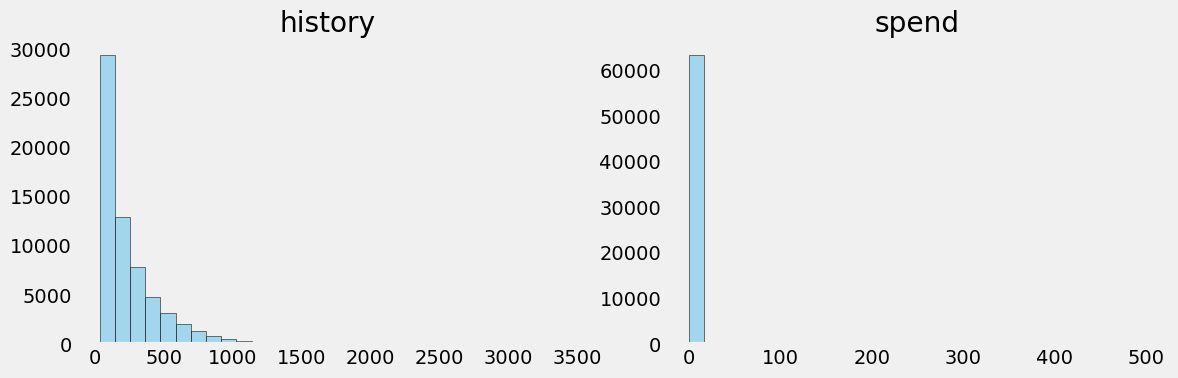

In [309]:
# 查看数值变量分布
num_cols = ['history', 'spend']
df[num_cols].hist(bins=30, figsize=(12, 4), grid=False, color='skyblue', alpha=0.75,edgecolor='black', linewidth=.5)
plt.axis('on')
plt.tight_layout()
plt.show()

<Axes: >

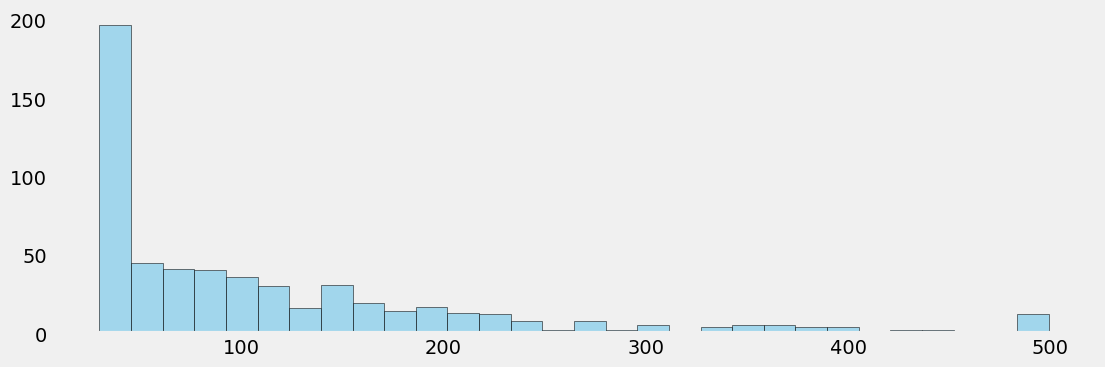

In [249]:
df[df['spend'].values>0]['spend'].hist(bins=30, figsize=(12, 4), grid=False, color='skyblue', alpha=0.75,edgecolor='black', linewidth=.5)

In [250]:
df['spend'].sum()

67258.12999999999

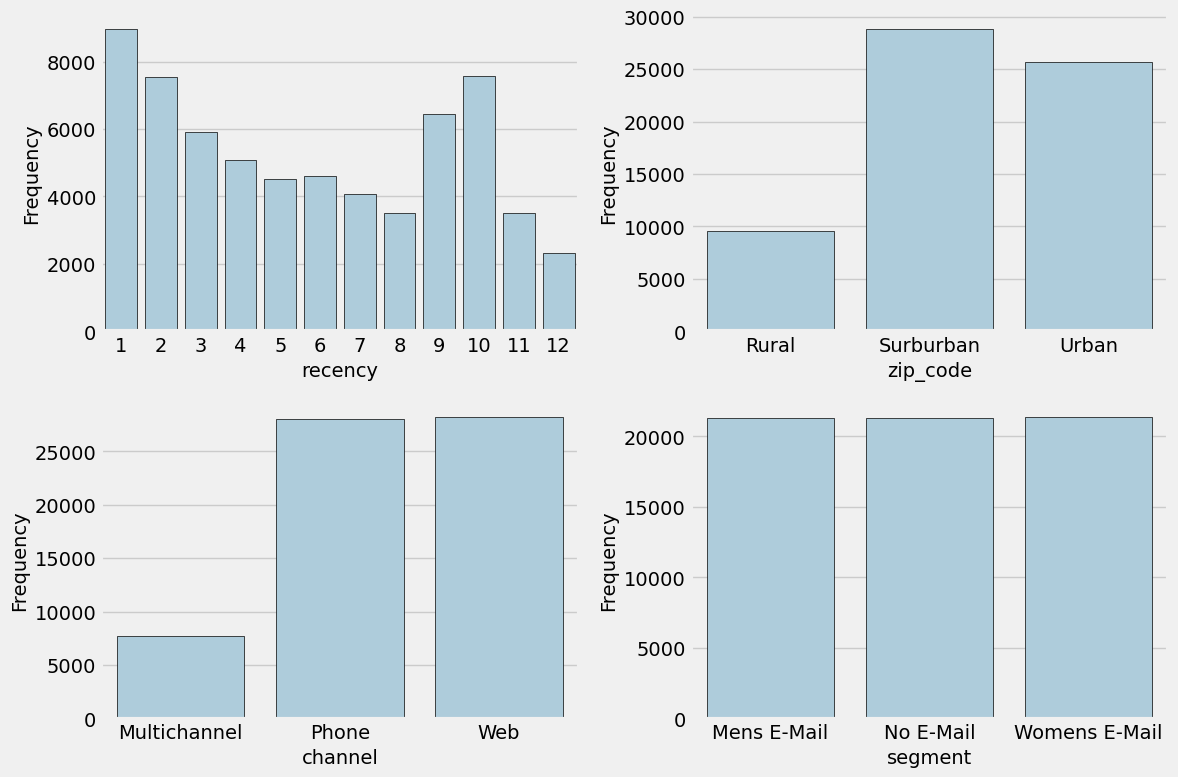

In [251]:
cat_cols = ['recency', 'zip_code', 'channel', 'segment']
fig, axes = plt.subplots(len(cat_cols)//2,2,figsize=(12,8))
for idx, feature in enumerate(cat_cols):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    group_order = sorted(df[feature].unique(), reverse=False)
    sns.countplot(x=feature, hue=row, order = group_order,
                  data=df, ax=ax, stat='count', palette='Paired', edgecolor='black', linewidth=.5, legend=False)
    ax.set_xlabel(feature, fontsize=14)                    
    ax.set_ylabel('Frequency', fontsize=14) 

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Encoding

研究 Mens E-Mail vs. No E-Mail 这一对关系

In [312]:
df = df[~(df['segment']=='Womens E-Mail')]

In [313]:
# 定义 treatment：Mens E-Mail 作为 treatment，No E-Mail 为 control
df['treatment'] = df['segment'].apply(lambda x: 1 if x == 'Mens E-Mail' else 0)

In [314]:
# Label：是否转化
label_col = 'conversion'

In [315]:
# 编码类别变量：one-hot encoding
df_processed = pd.get_dummies(df, columns=['zip_code', 'channel', 'history_segment'], drop_first=True, dtype=int)

In [321]:
df_processed.head()

,recency,history,mens,womens,newbie,segment,visit,conversion,spend,treatment,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +"
1,6,329.08,1,1,1,No E-Mail,0,0,0.0,0,0,0,0,1,0,1,0,0,0,0
3,9,675.83,1,0,1,Mens E-Mail,0,0,0.0,1,0,0,0,1,0,0,0,1,0,0
8,9,675.07,1,1,1,Mens E-Mail,0,0,0.0,1,0,0,1,0,0,0,0,1,0,0
13,2,101.64,0,1,0,Mens E-Mail,1,0,0.0,1,0,1,0,1,1,0,0,0,0,0
14,4,241.42,0,1,1,No E-Mail,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0


In [341]:
# 特征列（排除 label，spend和segment）
feature_cols = [col for col in df_processed.columns if col not in ['treatment','segment', 'visit', 'conversion', 'spend']]

In [342]:
feature_cols

['recency',
 'history',
 'mens',
 'womens',
 'newbie',
 'zip_code_Surburban',
 'zip_code_Urban',
 'channel_Phone',
 'channel_Web',
 'history_segment_2) $100 - $200',
 'history_segment_3) $200 - $350',
 'history_segment_4) $350 - $500',
 'history_segment_5) $500 - $750',
 'history_segment_6) $750 - $1,000',
 'history_segment_7) $1,000 +']

## 3. ATE

In [358]:
X = df_processed[feature_cols].drop('history',axis=1)
X.head()

,recency,mens,womens,newbie,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +"
1,6,1,1,1,0,0,0,1,0,1,0,0,0,0
3,9,1,0,1,0,0,0,1,0,0,0,1,0,0
8,9,1,1,1,0,0,1,0,0,0,0,1,0,0
13,2,0,1,0,0,1,0,1,1,0,0,0,0,0
14,4,0,1,1,0,0,0,0,0,1,0,0,0,0


In [359]:
T = df_processed['treatment']  # 1 = Mens E-Mail, 0 = No E-Mail
T

1        0
3        1
8        1
13       1
14       0
        ..
63994    1
63995    1
63996    1
63997    1
63999    1
Name: treatment, Length: 42613, dtype: int64

In [360]:
Y = df_processed[label_col]    # conversion label
Y

1        0
3        0
8        0
13       0
14       0
        ..
63994    0
63995    0
63996    0
63997    0
63999    0
Name: conversion, Length: 42613, dtype: int64

### 3.1 Naive

In [361]:
ate_naive = Y[T == 1].mean() - Y[T == 0].mean()
ate_naive

0.006805006519615695

### 3.2 线性回归调整

In [362]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [363]:
# 添加处理变量和截距项
X_reg = sm.add_constant(pd.concat([X, T], axis=1))

# 拟合逻辑回归模型
model = sm.Logit(Y, X_reg).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.050160
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                42613
Model:                          Logit   Df Residuals:                    42597
Method:                           MLE   Df Model:                           15
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                 0.03461
Time:                        21:57:39   Log-Likelihood:                -2137.5
converged:                       True   LL-Null:                       -2214.1
Covariance Type:            nonrobust   LLR p-value:                 5.425e-25
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.1975      0.287    -18.085      0.000      -5.761      -4.634
recency                             -0.0629      0.016     -4.004      0.000      -0.094      -0.032
mens                                 0.4377      0.157      2.780      0.005       0.129       0.746
womens                               0.3796      0.156      2.433      0.015       0.074       0.685
newbie                              -0.5209      0.126     -4.131      0.000      -0.768      -0.274
zip_code_Surburban                  -0.2185      0.144     -1.522      0.128      -0.500       0.063
zip_code_Urban                      -0.1970      0.145     -1.355      0.175      -0.482       0.088
channel_Phone                        0.0318      0.164      0.193      0.847      -0.291       0.354
channel_Web                          0.1763      0.161      1.092      0.275      -0.140       0.492
history_segment_2) $100 - $200      -0.0702      0.162     -0.434      0.664      -0.387       0.247
history_segment_3) $200 - $350       0.3129      0.154      2.026      0.043       0.010       0.616
history_segment_4) $350 - $500       0.5836      0.174      3.359      0.001       0.243       0.924
history_segment_5) $500 - $750       0.4266      0.237      1.802      0.071      -0.037       0.891
history_segment_6) $750 - $1,000     0.7942      0.282      2.821      0.005       0.242       1.346
history_segment_7) $1,000 +          0.9914      0.297      3.341      0.001       0.410       1.573
treatment                            0.7876      0.110      7.170      0.000       0.572       1.003
====================================================================================================
"""

In [364]:
ate_reg = model.params['treatment']  # 处理变量的系数即为 ATE
ate_reg

0.787607547055733

In [365]:
# 转换为概率差异（需要边际效应）
margeff = model.get_margeff()
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             conversion
Method:                          dydx
At:                           overall
====================================================================================================
                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
recency                             -0.0006      0.000     -3.931      0.000      -0.001      -0.000
mens                                 0.0039      0.001      2.756      0.006       0.001       0.007
womens                               0.0034      0.001      2.417      0.016       0.001       0.006
newbie                              -0.0047      0.001     -4.050      0.000      -0.007      -0.002
zip_code_Surburban                  -0.0020      0.001     -1.518      0.129      -0.005       0.001
zip_code_Urban                      -0.0018      0.001     -1.352      0.176      -0.004       0.001
channel_Phone                        0.0003      0.001      0.193      0.847      -0.003       0.003
channel_Web                          0.0016      0.001      1.091      0.275      -0.001       0.004
history_segment_2) $100 - $200      -0.0006      0.001     -0.434      0.664      -0.003       0.002
history_segment_3) $200 - $350       0.0028      0.001      2.016      0.044    7.85e-05       0.006
history_segment_4) $350 - $500       0.0053      0.002      3.316      0.001       0.002       0.008
history_segment_5) $500 - $750       0.0038      0.002      1.795      0.073      -0.000       0.008
history_segment_6) $750 - $1,000     0.0072      0.003      2.795      0.005       0.002       0.012
history_segment_7) $1,000 +          0.0089      0.003      3.299      0.001       0.004       0.014
treatment                            0.0071      0.001      6.772      0.000       0.005       0.009
====================================================================================================
"""

In [366]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(pd.DataFrame({'变量': X.columns, 'VIF': vif}))

                                  变量       VIF
0                            recency  3.567849
1                               mens  5.427955
2                             womens  5.422627
3                             newbie  2.348303
4                 zip_code_Surburban  3.484164
5                     zip_code_Urban  3.215796
6                      channel_Phone  4.088128
7                        channel_Web  4.135677
8     history_segment_2) $100 - $200  1.570634
9     history_segment_3) $200 - $350  1.707543
10    history_segment_4) $350 - $500  1.427669
11    history_segment_5) $500 - $750  1.538574
12  history_segment_6) $750 - $1,000  1.245658
13       history_segment_7) $1,000 +  1.193573


### 3.3 倾向得分匹配 (PSM)

In [369]:
from sklearn.neighbors import NearestNeighbors

# 估计倾向得分（使用逻辑回归）
ps_model = LogisticRegression().fit(X, T)
ps = ps_model.predict_proba(X)[:, 1] # 倾向得分
ps

array([0.51769955, 0.50313662, 0.50400556, ..., 0.50213317, 0.49939981,
       0.49581548])

In [370]:
# 匹配处理组和对照组（最近邻匹配）
treated = np.where(T == 1)[0]
control = np.where(T == 0)[0]

nbrs = NearestNeighbors(n_neighbors=1).fit(ps[control].reshape(-1, 1))
distances, indices = nbrs.kneighbors(ps[treated].reshape(-1, 1))

# 计算匹配后的 ATE
matched_control = control[indices.flatten()]
ate_psm = Y.iloc[treated].mean() - Y.iloc[matched_control].mean()
print(f"PSM ATE: {ate_psm:.4f}")

PSM ATE: 0.0098


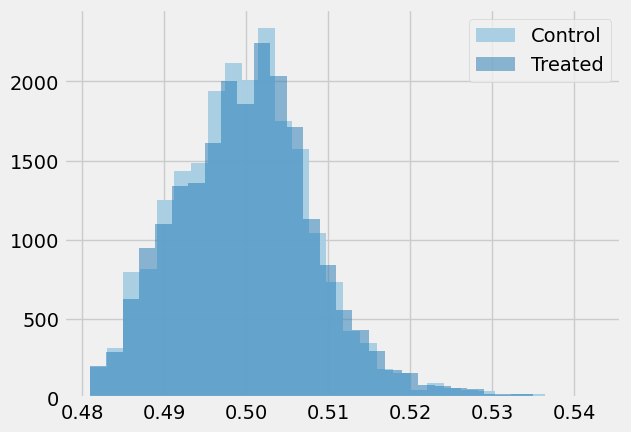

In [423]:
# 倾向得分分布直方图
plt.hist(ps[T == 0], bins=30, label='Control', alpha=0.95)
plt.hist(ps[T == 1], bins=30, label='Treated', alpha=0.5)
plt.legend()
plt.show()

### 3.4 IPW

$$ATE_{ipw} = \mathbb{E}[Y\times\frac{T}{e(x)}-Y\times\frac{1-T}{1-e(x)}]$$

In [382]:
ate_ipw = (Y * T / ps).mean() - (Y * (1 - T) / (1 - ps)).mean()
print(f"IPW ATE: {ate_ipw:.4f}")

IPW ATE: 0.0068


### 3.5 Double Robust

$$ATE_{dr}=\mathbb{E}[(T\times\frac{Y-\hat\mu_1(x)}{e(x)}+\hat\mu_1(x))-((1-T)\times\frac{Y-\hat\mu_0(x)}{1-e(x)}+\hat\mu_0(x))]$$

In [384]:
# 拟合结果模型（逻辑回归）
outcome_model = LogisticRegression().fit(X, Y)
Y_pred_1 = outcome_model.predict_proba(X)[:, 1]  # 预测处理后的结果
Y_pred_0 = outcome_model.predict_proba(X)[:, 0]  # 预测未处理的结果

# 计算双重稳健估计量
ate_dr = (
    (T * (Y - Y_pred_1) / ps + Y_pred_1) -
    ((1 - T) * (Y - Y_pred_0) / (1 - ps) + Y_pred_0)
).mean()

print(f"Doubly Robust ATE: {ate_dr:.4f}")

Doubly Robust ATE: 0.0069


---

## 4. CATE Uplift 模型

In [528]:
from econml.metalearners import TLearner
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklift.metrics import uplift_auc_score, qini_auc_score, uplift_at_k
from scipy.stats import kendalltau

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [582]:
feature_cols = [col for col in df_processed.columns if col not in ['history', 'treatment','segment', 'visit', 'conversion', 'spend']]

### 4.1 S-Learner

In [583]:
# 准备数据
X = df_processed[feature_cols].copy()
X['treatment'] = df_processed['treatment']  # 将 treatment 合并为一列特征
Y = df_processed[label_col].values          # label 可为 conversion 或 spend

In [584]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [585]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [586]:
# 拟合回归器
model = LGBMRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info] Number of data points in the train set: 29829, number of used features: 15
[LightGBM] [Info] Start training from score 0.008750


LGBMRegressor(random_state=42)

In [587]:
# 复制 X_test，并分别置为 treatment=1 和 treatment=0
X_test_t1 = X_test.copy()
X_test_t1['treatment'] = 1
X_test_t0 = X_test.copy()
X_test_t0['treatment'] = 0

In [588]:
# 标准化
X_test_t1_scaled = scaler.transform(X_test_t1)
X_test_t0_scaled = scaler.transform(X_test_t0)

In [589]:
# 预测 uplift
y1_pred = model.predict(X_test_t1_scaled)
y0_pred = model.predict(X_test_t0_scaled)
te_pred = y1_pred - y0_pred
te_pred

array([ 0.05739471,  0.00482128,  0.01747347, ...,  0.02322858,
        0.01078125, -0.00952992])

count    12784.000000
mean         0.007090
std          0.014748
min         -0.109671
25%          0.001737
50%          0.004229
75%          0.009099
max          0.146326
dtype: float64


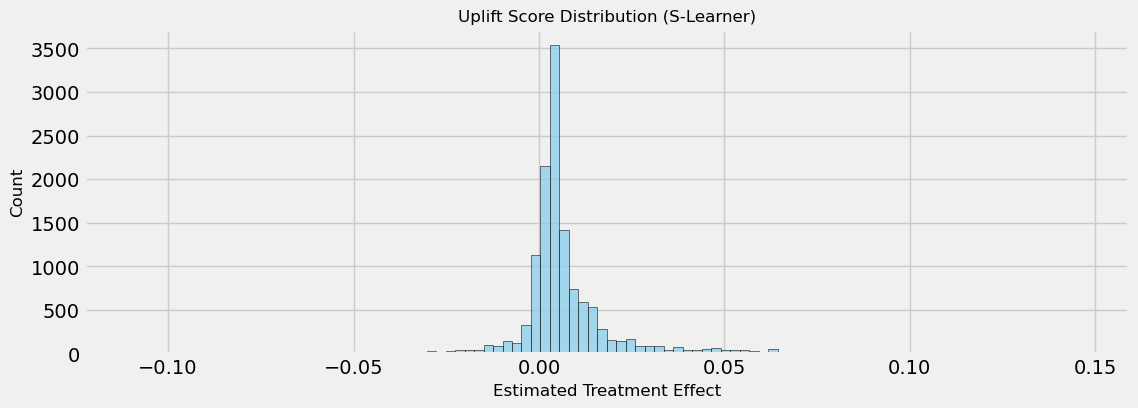

In [590]:
print(pd.Series(te_pred).describe())
plt.figure(figsize=(12,4))
plt.hist(te_pred, bins=100, color='skyblue', alpha=0.75,edgecolor='black', linewidth=.5)
plt.title("Uplift Score Distribution (S-Learner)", fontsize=12)
plt.xlabel("Estimated Treatment Effect", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [591]:
def plot_uplift_by_percentile(treatment, y, uplift_score, bins=10):
    df_plot = pd.DataFrame({
        'treatment': treatment,
        'y': y,
        'uplift_score': uplift_score
    })

    df_plot['bucket'] = pd.qcut(df_plot['uplift_score'], bins, labels=False, duplicates='drop')

    # 计算每个 bucket 中 treatment - control 的转化率差值（uplift）
    uplift_per_bucket = df_plot.groupby('bucket').apply(
        lambda d: d[d['treatment'] == 1]['y'].mean() - d[d['treatment'] == 0]['y'].mean()
    )

    # 绘图
    plt.figure(figsize=(12, 4))
    uplift_per_bucket.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Uplift by Predicted Score Decile', fontsize=12)
    plt.xlabel('Uplift Score Decile (Higher = More Likely to Benefit)', fontsize=12)
    plt.ylabel('Estimated Uplift (Conversion Rate Difference)', fontsize=12)
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.show()

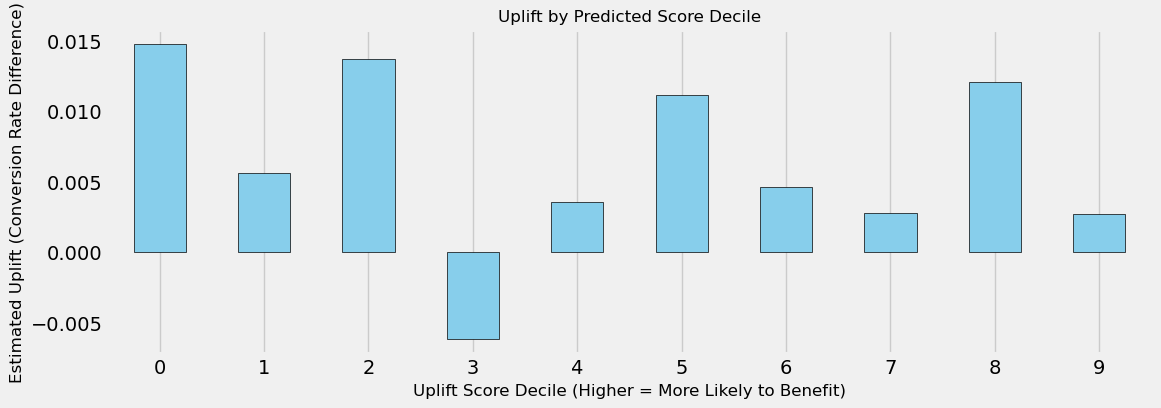

In [592]:
plot_uplift_by_percentile(X_test['treatment'], Y_test, te_pred)

In [593]:
def compute_lift_at_k(df, k=0.3):
    """
    手动计算 uplift 模型的 Lift@k（例如前 30% 的 uplift 效果倍数）
    
    df: 包含 'uplift_score', 'treatment', 'y' 三列的 DataFrame
    k: float, 表示 top K 百分比
    
    return: float, Lift@k 值
    """
    df_sorted = df.sort_values(by='uplift_score', ascending=False).reset_index(drop=True)
    top_k = int(len(df_sorted) * k)
    df_top = df_sorted.iloc[:top_k]

    # treatment 和 control 分开求转化率
    treat_top = df_top[df_top['treatment'] == 1]
    control_top = df_top[df_top['treatment'] == 0]

    # 避免除以0
    if len(control_top) == 0 or len(treat_top) == 0:
        return np.nan

    uplift_top = treat_top['y'].mean() - control_top['y'].mean()

    # 全体 baseline uplift
    treat_all = df[df['treatment'] == 1]
    control_all = df[df['treatment'] == 0]
    uplift_all = treat_all['y'].mean() - control_all['y'].mean()

    if uplift_all == 0:
        return np.nan

    lift_at_k = uplift_top / uplift_all
    return lift_at_k

In [594]:
uplift_df = pd.DataFrame({
    'treatment': T_test,       # 0/1
    'y': Y_test,               # 实际 label
    'uplift_score': te_pred    # 模型预测的 uplift 分数
})
auuc = uplift_auc_score(y_true=uplift_df['y'],
                        uplift=uplift_df['uplift_score'],
                        treatment=uplift_df['treatment'])

auqc = qini_auc_score(y_true=uplift_df['y'],
                      uplift=uplift_df['uplift_score'],
                      treatment=uplift_df['treatment'])

lift_30 = compute_lift_at_k(uplift_df, k=0.3)

print(auuc, auqc, lift_30)

-0.001976527707682586 -0.05030619872900833 2.7716856551009843


### 4.2 T-Learner

In [595]:
# 特征、处理、标签
X = df_processed[feature_cols].values
X

array([[6, 1, 1, ..., 0, 0, 0],
       [9, 1, 0, ..., 1, 0, 0],
       [9, 1, 1, ..., 1, 0, 0],
       ...,
       [5, 0, 1, ..., 0, 0, 0],
       [6, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [596]:
T = df_processed['treatment'].values  # 1 = Mens E-Mail, 0 = No E-Mail
T

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [597]:
Y = df_processed[label_col].values    # conversion label
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [598]:
# 拆分数据
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(
    X, T, Y, test_size=0.3, random_state=42, stratify=T)

In [599]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [600]:
# 估计 uplift 差异
df_test = pd.DataFrame(X_test, columns=feature_cols)
df_test['treatment'] = T_test
df_test['y'] = Y_test

treat_mean = df_test[df_test['treatment'] == 1]['y'].mean()
control_mean = df_test[df_test['treatment'] == 0]['y'].mean()
print(f'Conversion rate - Treated: {treat_mean:.6f}, Control: {control_mean:.6f}, Estimated uplift: {treat_mean - control_mean:.6f}')

Conversion rate - Treated: 0.013141, Control: 0.006414, Estimated uplift: 0.006727


In [601]:
# 初始化 T-Learner：控制组和处理组用两个 LGBM
model = TLearner(models=LGBMRegressor(n_estimators=100, random_state=42))
model.fit(Y=Y_train, T=T_train, X=X_train)
te_pred = model.effect(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 14914, number of used features: 14
[LightGBM] [Info] Start training from score 0.005431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 14915, number of used features: 14
[LightGBM] [Info] Start training from score 0.012270


In [602]:
# 预测 uplift（个体处理效应）
te_pred = model.effect(X_test)
np.unique(te_pred, return_counts=True)

(array([-0.14566176, -0.13449374, -0.12954291, ...,  0.18245086,
         0.21898366,  0.24423613]),
 array([5, 3, 1, ..., 1, 5, 2], dtype=int64))

count    12784.000000
mean         0.007009
std          0.021627
min         -0.145662
25%         -0.000614
50%          0.003906
75%          0.011640
max          0.244236
dtype: float64


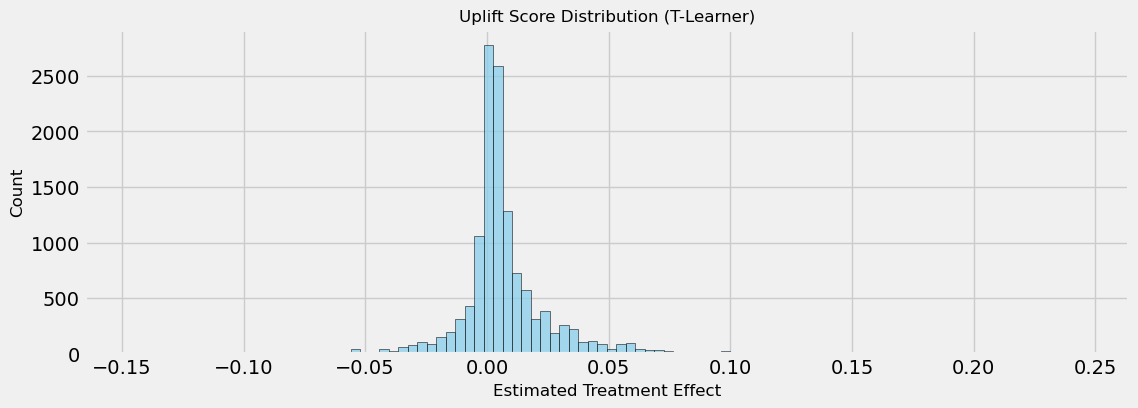

In [603]:
print(pd.Series(te_pred).describe())
plt.figure(figsize=(12,4))
plt.hist(te_pred, bins=100, color='skyblue', alpha=0.75,edgecolor='black', linewidth=.5)
plt.title("Uplift Score Distribution (T-Learner)", fontsize=12)
plt.xlabel("Estimated Treatment Effect", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

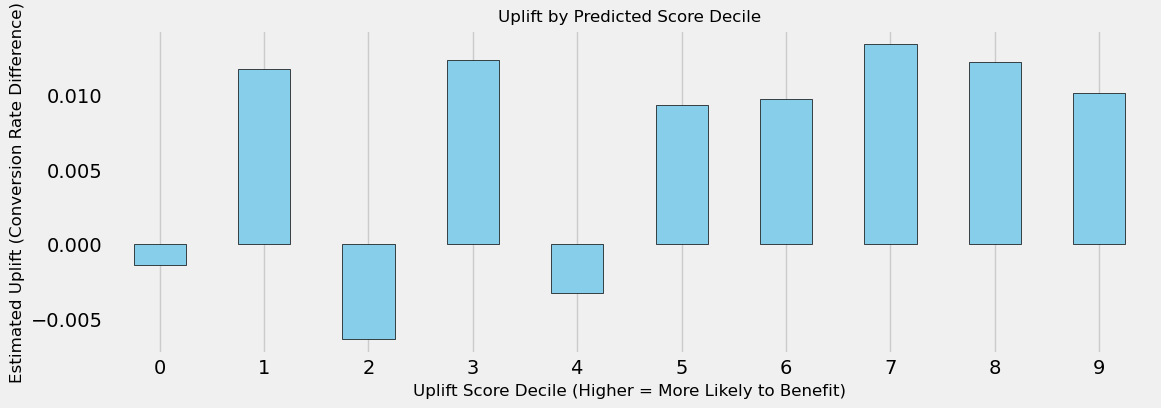

In [604]:
plot_uplift_by_percentile(T_test, Y_test, te_pred)

In [605]:
uplift_df = pd.DataFrame({
    'treatment': T_test,       # 0/1
    'y': Y_test,               # 实际 label
    'uplift_score': te_pred    # 模型预测的 uplift 分数
})
auuc = uplift_auc_score(y_true=uplift_df['y'],
                        uplift=uplift_df['uplift_score'],
                        treatment=uplift_df['treatment'])

auqc = qini_auc_score(y_true=uplift_df['y'],
                      uplift=uplift_df['uplift_score'],
                      treatment=uplift_df['treatment'])

lift_30 = compute_lift_at_k(uplift_df, k=0.3)

print(auuc, auqc, lift_30)

0.004046050309253252 0.10587515080928288 1.7648599431287482


## 4.3 X-Learner

In [606]:
from econml.metalearners import XLearner

In [607]:
# 使用回归器初始化 X-Learner
base_learner = LGBMRegressor(n_estimators=100, random_state=42)
x_learner = XLearner(models=base_learner)

In [608]:
# 拟合模型
x_learner.fit(Y=Y_train, T=T_train, X=X_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 14914, number of used features: 14
[LightGBM] [Info] Start training from score 0.005431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 14915, number of used features: 14
[LightGBM] [Info] Start training from score 0.012270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

In [609]:
# 预测个体 uplift（treatment effect）
te_pred = x_learner.effect(X_test)

count    12784.000000
mean         0.007051
std          0.016531
min         -0.104907
25%          0.000223
50%          0.004793
75%          0.010759
max          0.185556
dtype: float64


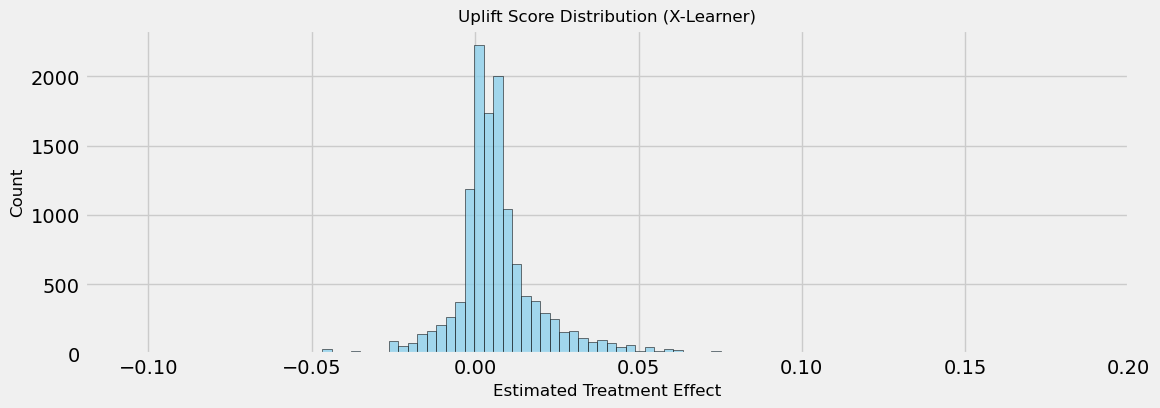

In [610]:
print(pd.Series(te_pred).describe())
plt.figure(figsize=(12,4))
plt.hist(te_pred, bins=100, color='skyblue', alpha=0.75,edgecolor='black', linewidth=.5)
plt.title("Uplift Score Distribution (X-Learner)", fontsize=12)
plt.xlabel("Estimated Treatment Effect", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

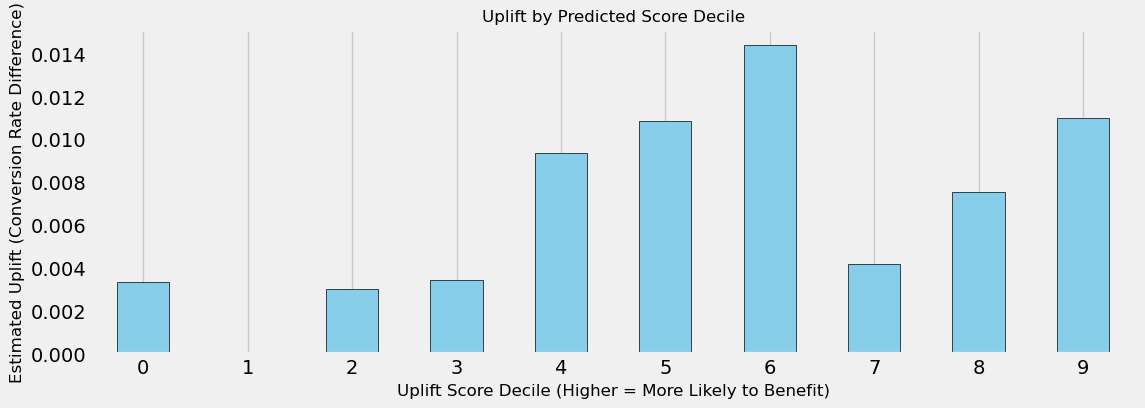

In [611]:
plot_uplift_by_percentile(T_test, Y_test, te_pred)

In [612]:
uplift_df = pd.DataFrame({
    'treatment': T_test,       # 0/1
    'y': Y_test,               # 实际 label
    'uplift_score': te_pred    # 模型预测的 uplift 分数
})
auuc = uplift_auc_score(y_true=uplift_df['y'],
                        uplift=uplift_df['uplift_score'],
                        treatment=uplift_df['treatment'])

auqc = qini_auc_score(y_true=uplift_df['y'],
                      uplift=uplift_df['uplift_score'],
                      treatment=uplift_df['treatment'])

lift_30 = compute_lift_at_k(uplift_df, k=0.3)

print(auuc, auqc, lift_30)

0.0032148366188513348 0.08414210445964837 1.123877164315266


## 4.4 DRLearner

In [613]:
from econml.dr import DRLearner

In [614]:
# 定义 outcome model 和 propensity model
outcome_model = LGBMRegressor(n_estimators=100, random_state=42)
propensity_model = LGBMClassifier(n_estimators=100, random_state=42)

In [615]:
# 初始化 DRLearner
dr_learner = DRLearner(model_regression=outcome_model,
                       model_propensity=propensity_model,
                       model_final=LGBMRegressor(n_estimators=100, random_state=42))

In [616]:
# 拟合
dr_learner.fit(Y=Y_train, T=T_train, X=X_train)

[LightGBM] [Info] Number of positive: 7457, number of negative: 7457
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 14914, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 14914, number of used features: 15
[LightGBM] [Info] Start training from score 0.009454
[LightGBM] [Info] Number of positive: 7458, number of negative: 7457
[LightGBM] [Info] Auto-choos

In [617]:
# 预测 uplift
te_pred = dr_learner.effect(X_test)

count    12784.000000
mean         0.007227
std          0.023167
min         -0.448019
25%         -0.000307
50%          0.003805
75%          0.009993
max          0.325030
dtype: float64


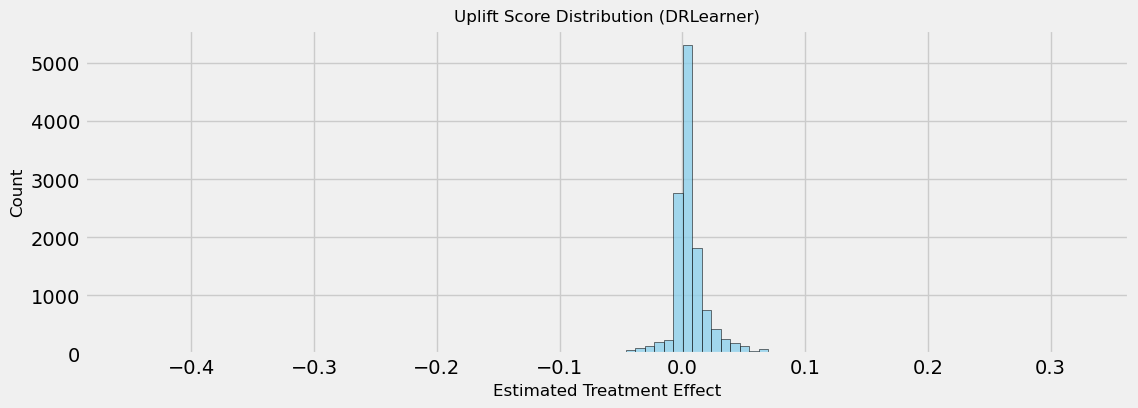

In [618]:
print(pd.Series(te_pred).describe())
plt.figure(figsize=(12,4))
plt.hist(te_pred, bins=100, color='skyblue', alpha=0.75,edgecolor='black', linewidth=.5)
plt.title("Uplift Score Distribution (DRLearner)", fontsize=12)
plt.xlabel("Estimated Treatment Effect", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

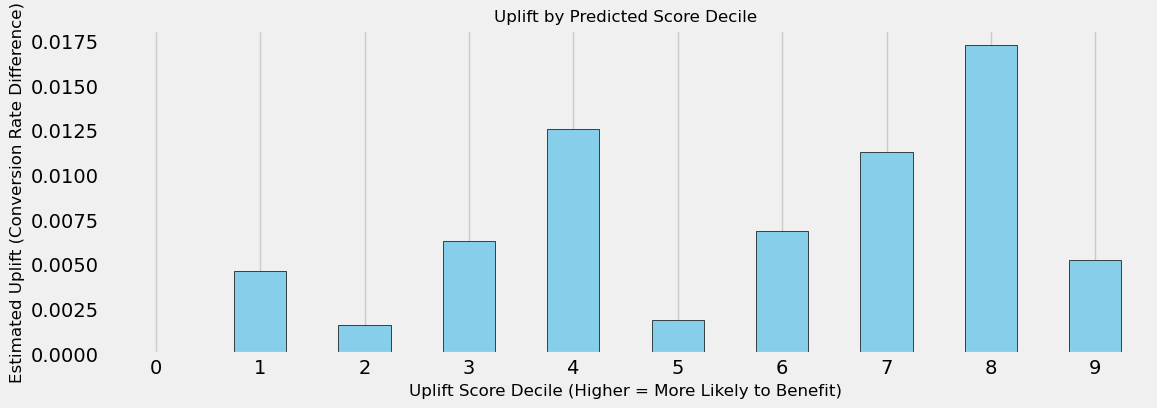

In [619]:
plot_uplift_by_percentile(T_test, Y_test, te_pred)

In [620]:
uplift_df = pd.DataFrame({
    'treatment': T_test,       # 0/1
    'y': Y_test,               # 实际 label
    'uplift_score': te_pred    # 模型预测的 uplift 分数
})
auuc = uplift_auc_score(y_true=uplift_df['y'],
                        uplift=uplift_df['uplift_score'],
                        treatment=uplift_df['treatment'])

auqc = qini_auc_score(y_true=uplift_df['y'],
                      uplift=uplift_df['uplift_score'],
                      treatment=uplift_df['treatment'])

lift_30 = compute_lift_at_k(uplift_df, k=0.3)

print(auuc, auqc, lift_30)

0.0032502876352182935 0.08325306401135951 1.672897440431685


### 4.5 CausalForest

In [621]:
from econml.dml import CausalForestDML
# 设置基学习器
estimator = LGBMRegressor(n_estimators=100, random_state=42)
propensity_model = LGBMClassifier(n_estimators=100, random_state=42)

In [622]:
# 初始化 CausalForestDML
cf_model = CausalForestDML(
    model_t=propensity_model,
    model_y=estimator,
    discrete_treatment=True,
    n_estimators=100,
    min_samples_leaf=10,
    max_depth=10,
    random_state=42
)

In [623]:
# 拟合
cf_model.fit(Y=Y_train, T=T_train, X=X_train)

[LightGBM] [Info] Number of positive: 7457, number of negative: 7457
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 14914, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 14914, number of used features: 14
[LightGBM] [Info] Start training from score 0.008784
[LightGBM] [Info] Number of positive: 7458, number of negative: 7457
[LightGBM] [Info] Auto-choos

In [624]:
# 预测 treatment effect（uplift 分数）
te_pred = cf_model.effect(X_test)

count    12784.000000
mean         0.007267
std          0.011883
min         -0.042713
25%          0.001044
50%          0.004533
75%          0.011741
max          0.087339
dtype: float64


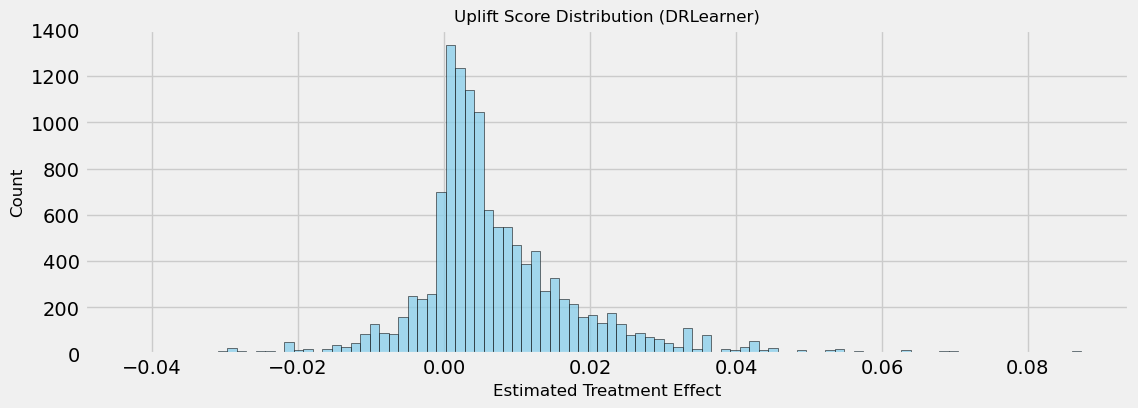

In [625]:
print(pd.Series(te_pred).describe())
plt.figure(figsize=(12,4))
plt.hist(te_pred, bins=100, color='skyblue', alpha=0.75,edgecolor='black', linewidth=.5)
plt.title("Uplift Score Distribution (DRLearner)", fontsize=12)
plt.xlabel("Estimated Treatment Effect", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

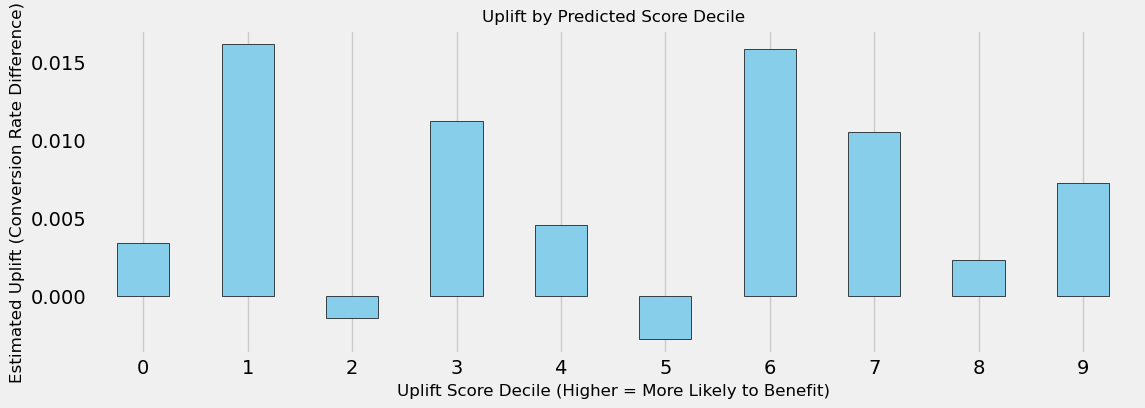

In [626]:
plot_uplift_by_percentile(T_test, Y_test, te_pred)

In [627]:
uplift_df = pd.DataFrame({
    'treatment': T_test,       # 0/1
    'y': Y_test,               # 实际 label
    'uplift_score': te_pred    # 模型预测的 uplift 分数
})
auuc = uplift_auc_score(y_true=uplift_df['y'],
                        uplift=uplift_df['uplift_score'],
                        treatment=uplift_df['treatment'])

auqc = qini_auc_score(y_true=uplift_df['y'],
                      uplift=uplift_df['uplift_score'],
                      treatment=uplift_df['treatment'])

lift_30 = compute_lift_at_k(uplift_df, k=0.3)

print(auuc, auqc, lift_30)

0.00015683292689042978 0.007121425744397252 1.0049540530828074


结论：T-Learner：AUUC、AUQC、Lift@30% 全面领先或居前。

---

## 5. Deep Uplifting